In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
import seaborn as sns

In [2]:
pd.set_option('max_columns', 50)
mpl.rcParams['lines.linewidth'] = 4
sns.set(style='white')

%matplotlib inline

In [3]:
df = pd.read_csv('../Data/customerData.csv')

In [4]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/10 8:26,3.39,17850.0,United Kingdom


In [5]:
df['OrderPeriod'] = df.InvoiceDate.apply(lambda x: datetime.strptime(x, "%d/%m/%y %H:%M").strftime('%Y-%m'))
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,OrderPeriod
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/10 8:26,2.55,17850.0,United Kingdom,2010-12
1,536365,71053,WHITE METAL LANTERN,6,01/12/10 8:26,3.39,17850.0,United Kingdom,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/10 8:26,2.75,17850.0,United Kingdom,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/10 8:26,3.39,17850.0,United Kingdom,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/10 8:26,3.39,17850.0,United Kingdom,2010-12


In [6]:
len(pd.unique(df['Customer ID']))

4373

In [19]:
len(df)

541910

In [7]:
df.set_index('Customer ID', inplace=True)
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Country,OrderPeriod
Customer ID,,,,,,,,
17850.0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/10 8:26,2.55,United Kingdom,2010-12
17850.0,536365,71053,WHITE METAL LANTERN,6,01/12/10 8:26,3.39,United Kingdom,2010-12
17850.0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/10 8:26,2.75,United Kingdom,2010-12
17850.0,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/10 8:26,3.39,United Kingdom,2010-12
17850.0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/10 8:26,3.39,United Kingdom,2010-12


In [8]:
df['CohortGroup'] = df.groupby(level=0)['InvoiceDate'].min().apply(lambda x: datetime.strptime(x, "%d/%m/%y %H:%M").strftime('%Y-%m'))

In [9]:
df.reset_index(inplace=True)
df.head() 

,Customer ID,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Country,OrderPeriod,CohortGroup
0,17850.0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/10 8:26,2.55,United Kingdom,2010-12,2010-12
1,17850.0,536365,71053,WHITE METAL LANTERN,6,01/12/10 8:26,3.39,United Kingdom,2010-12,2010-12
2,17850.0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/10 8:26,2.75,United Kingdom,2010-12,2010-12
3,17850.0,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/10 8:26,3.39,United Kingdom,2010-12,2010-12
4,17850.0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/10 8:26,3.39,United Kingdom,2010-12,2010-12


In [11]:
grouped = df.groupby(['CohortGroup', 'OrderPeriod'])

cohorts = grouped.agg({'Customer ID':pd.Series.nunique,
                       'Invoice':pd.Series.nunique,
                       'Price':np.sum})
cohorts.rename(columns = {'Customer ID': 'TotalUsers',
               'Invoice': 'TotalOrders'}, inplace = True)
cohorts.head()

TotalUsers  TotalOrders     Price
CohortGroup OrderPeriod                                   
2010-12     2010-12           389.0          614  30812.02
            2011-01            73.0          113   6626.68
            2011-02            56.0           83   4018.29
            2011-03            71.0          109   5537.58
            2011-04            60.0           80   3541.32

In [15]:
def cohort_period(df):
    df['CohortPeriod'] = np.arange(len(df))+1
    return df

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.tail()

TotalUsers  TotalOrders     Price  CohortPeriod
CohortGroup OrderPeriod                                                 
2011-12     2011-08            85.0          131   6750.49             9
            2011-09           114.0          184  12495.41            10
            2011-10           139.0          223  28079.96            11
            2011-11           184.0          330  20253.78            12
            2011-12           350.0          437  21813.12            13

In [13]:
cohorts.reset_index(inplace=True)

In [14]:
cohorts.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)
cohorts.head()

OrderPeriod  TotalUsers  TotalOrders     Price
CohortGroup CohortPeriod                                               
2010-12     1                2010-12       389.0          614  30812.02
            2                2011-01        73.0          113   6626.68
            3                2011-02        56.0           83   4018.29
            4                2011-03        71.0          109   5537.58
            5                2011-04        60.0           80   3541.32

In [13]:
cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first()
cohort_group_size.head()

CohortGroup
2010-12    389.0
2011-01     26.0
2011-02     58.0
2011-03     55.0
2011-04     57.0
Name: TotalUsers, dtype: float64

In [15]:
cohorts['TotalUsers'].unstack(0).head()

CohortGroup,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
CohortPeriod,,,,,,,,,,,,,
1,389.0,26.0,58.0,55.0,57.0,31.0,40.0,32.0,34.0,50.0,29.0,71.0,76.0
2,73.0,179.0,59.0,50.0,48.0,42.0,50.0,32.0,35.0,53.0,46.0,52.0,64.0
3,56.0,27.0,270.0,56.0,52.0,43.0,44.0,28.0,35.0,52.0,27.0,52.0,56.0
4,71.0,31.0,71.0,327.0,58.0,46.0,59.0,45.0,48.0,69.0,56.0,72.0,67.0
5,60.0,26.0,63.0,57.0,306.0,37.0,64.0,32.0,44.0,62.0,39.0,52.0,57.0


In [16]:
user_retention = cohorts['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)
user_retention.head(10)

CohortGroup,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
CohortPeriod,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000,1.00000,1.000000,1.00,1.000000,1.000000,1.000000
2,0.187661,6.884615,1.017241,0.909091,0.842105,1.354839,1.250,1.00000,1.029412,1.06,1.586207,0.732394,0.842105
3,0.143959,1.038462,4.655172,1.018182,0.912281,1.387097,1.100,0.87500,1.029412,1.04,0.931034,0.732394,0.736842
4,0.182519,1.192308,1.224138,5.945455,1.017544,1.483871,1.475,1.40625,1.411765,1.38,1.931034,1.014085,0.881579
5,0.154242,1.000000,1.086207,1.036364,5.368421,1.193548,1.600,1.00000,1.294118,1.24,1.344828,0.732394,0.750000
6,0.185090,0.961538,1.327586,1.454545,1.333333,8.806452,1.775,1.56250,1.852941,1.50,1.862069,1.126761,1.092105
7,0.185090,1.038462,1.051724,1.272727,1.140351,1.967742,7.700,1.25000,1.823529,1.48,1.793103,1.183099,0.986842
8,0.161954,1.115385,1.155172,1.054545,1.210526,1.612903,1.525,7.50000,2.000000,1.42,1.896552,1.183099,1.026316
9,0.164524,0.769231,1.068966,1.054545,1.140351,1.774194,1.825,1.37500,7.500000,1.46,1.689655,1.084507,1.118421


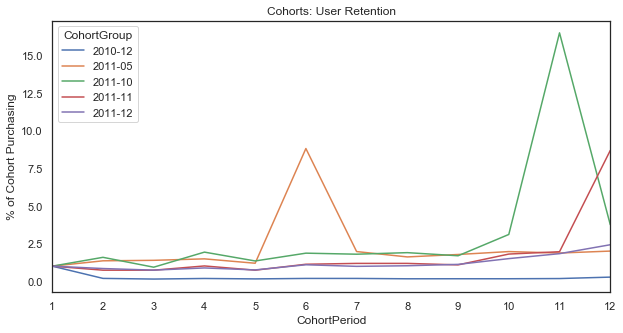

In [21]:
user_retention[['2010-12','2011-05','2011-10','2011-11','2011-12']].plot(figsize=(10,5))
plt.title('Cohorts: User Retention')
plt.xticks(np.arange(1, 12.1, 1))
plt.xlim(1, 12)
plt.ylabel('% of Cohort Purchasing');

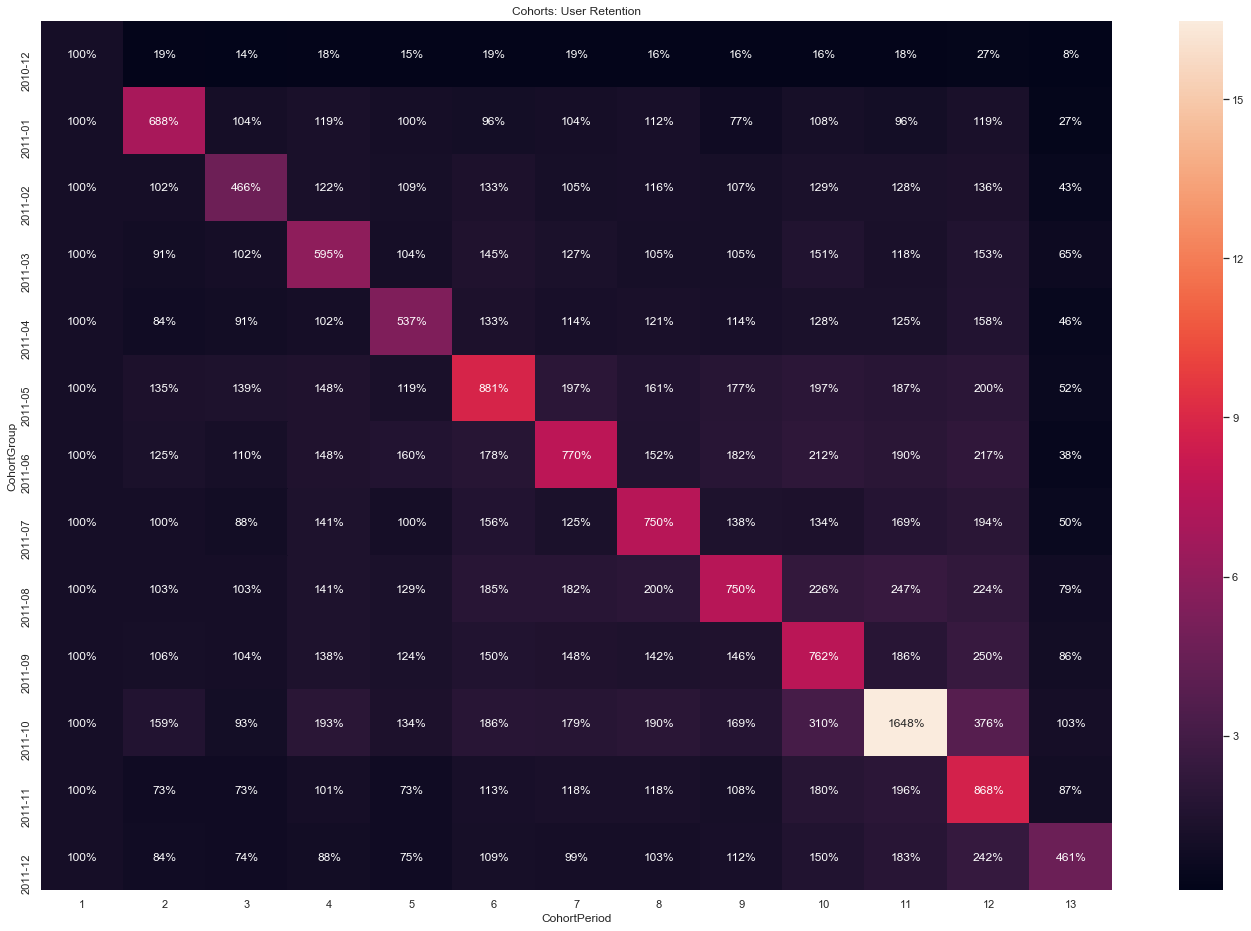

In [18]:
plt.figure(figsize=(24, 16))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%');

In [23]:
cohort_order_size = cohorts['TotalOrders'].groupby(level=0).first()
cohort_order_size.head()

CohortGroup
2010-12    614
2011-01     37
2011-02    164
2011-03    108
2011-04    143
Name: TotalOrders, dtype: int64

In [25]:
order_retention =cohorts['TotalOrders'].unstack(0).divide(cohort_order_size, axis=1)
order_retention.head(10)

CohortGroup,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
CohortPeriod,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000,1.000000,1.000000
2,0.184039,6.351351,0.774390,0.925926,0.524476,1.104167,1.090909,1.02,0.867647,1.000000,1.034483,0.654545,0.821705
3,0.135179,1.135135,2.439024,0.796296,0.580420,1.312500,0.984848,0.88,0.750000,0.893805,0.672414,0.618182,0.596899
4,0.177524,1.135135,1.000000,4.351852,0.762238,1.229167,1.348485,1.28,1.220588,1.247788,1.327586,0.972727,0.813953
5,0.130293,0.891892,0.737805,0.842593,3.055944,1.208333,1.409091,1.04,1.088235,1.159292,0.965517,0.700000,0.627907
6,0.187296,0.918919,1.030488,1.342593,1.132867,7.979167,1.787879,1.44,2.044118,1.566372,1.344828,1.100000,1.054264
7,0.169381,1.054054,0.951220,1.083333,0.790210,1.750000,6.681818,1.16,1.529412,1.495575,1.327586,1.163636,0.906977
8,0.153094,1.135135,0.932927,1.092593,0.790210,1.291667,1.303030,6.98,1.632353,1.362832,1.258621,1.090909,0.914729
9,0.141694,0.729730,0.768293,0.833333,0.860140,1.395833,1.742424,1.38,5.558824,1.318584,1.275862,0.981818,1.015504


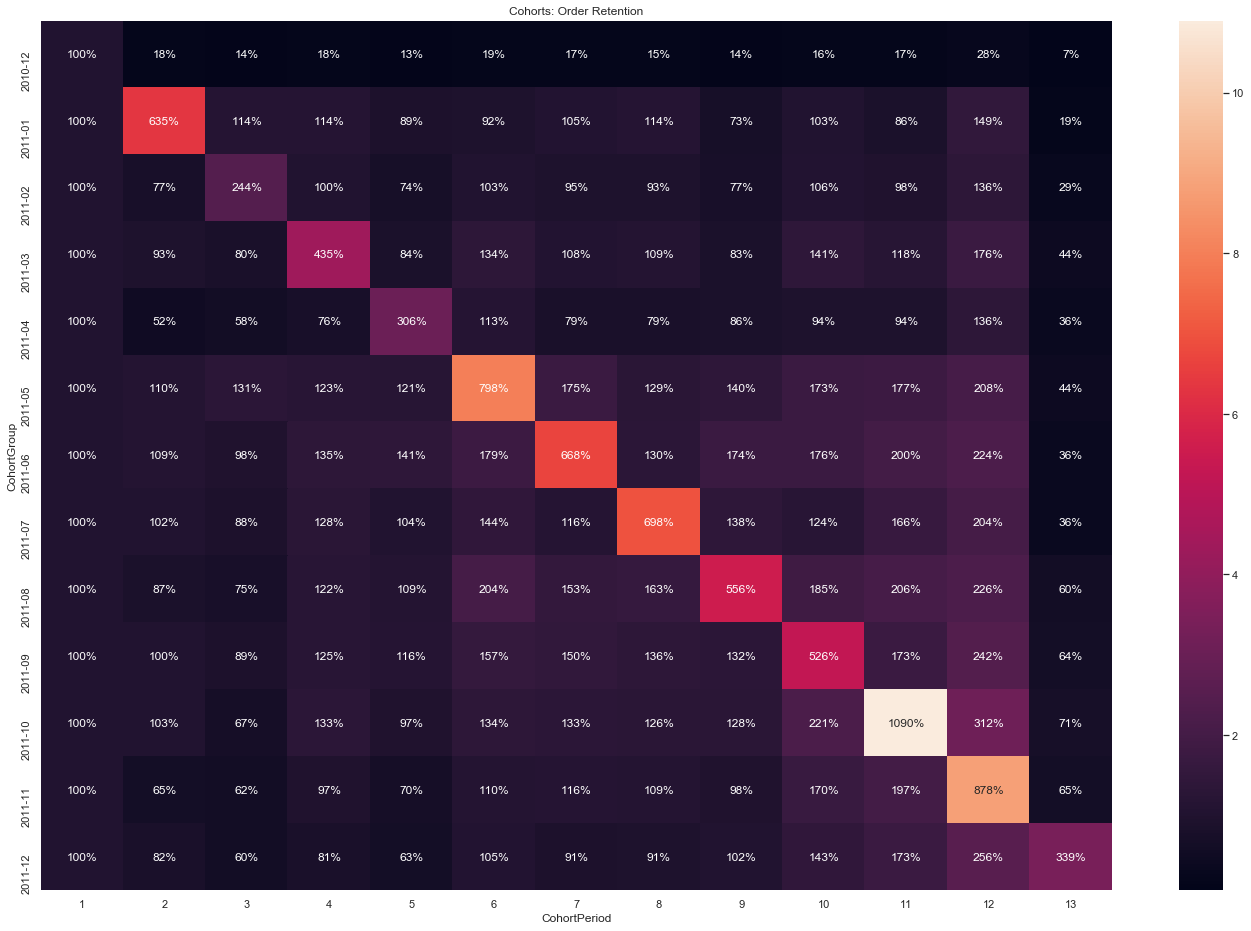

In [26]:
plt.figure(figsize=(24, 16))
plt.title('Cohorts: Order Retention')
sns.heatmap(order_retention.T, mask=order_retention.T.isnull(), annot=True, fmt='.0%');